<a href="https://colab.research.google.com/github/JackCollins1991/GoogleColabs/blob/NaiveBayesClassifer/LogisticRegressionAssumptionsHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [5]:
from copy import deepcopy
!pip install factor_analyzer
!pip install seaborn
!pin install itertools

import itertools as it

import seaborn as sb
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

/bin/bash: pin: command not found


# Functions

In [6]:
def TestClassBalance(dependant):
  p = plt.bar(dependant, height = max(dependant.value_counts()))
  return p

def TestLinearityAssumption(predictors):
  
  return 

def TestOutliers(predictors, z_threshold):
  z_scores = scipy.stats.zscore(predictors)
  outliers = (abs(z_scores) > z_threshold).all(axis=1)
  return outliers

def TestMulticollinearity(predictors):
  vif_data = pd.DataFrame()
  vif_data["feature"] = predictors.columns
  vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
  for i in range(len(predictors.columns))]

  return vif_data

def TestCorrelations(predictors):
    heatmap = sb.heatmap(predictors.corr())
    return heatmap


In [7]:
def LogisticRegressionScatterPlot(model, predictors, dependant, class_int = 0, color_class = 0):
  weights = model.coef_[class_int]
  x_values = model.intercept_[class_int] + predictors.dot(weights.T)
  y_values = x_values > 0
  y_values = y_values.astype(int)
  actual_value = dependant
  if color_class > 0:
    actual_value = dependant == color_class
    actual_value = actual_value.astype(int)

  plot_table = pd.DataFrame()
  plot_table["Prediction Function"] = x_values
  plot_table["Predicted Value"] = y_values
  plot_table["Actual Value"] = actual_value

  plot_table.plot.scatter(x = "Prediction Function", y = "Predicted Value", c = "Actual Value", colormap='viridis')
  return





# Example Logistic Regression Pipeline

In [8]:
# Get Data and seperate predictors and dependant variables
data = sb.load_dataset("iris")
predictors = data.select_dtypes(include='number')
dependant = data["species"]

<BarContainer object of 150 artists>

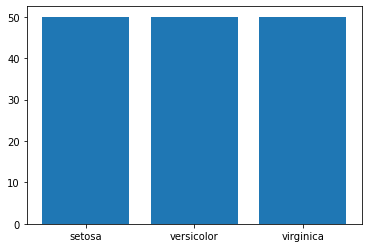

In [9]:
# Compare frequency in each class. A small count in a class means you should 
# avoid using accuracy as your model performance measure (ie use F1 instead)
TestClassBalance(dependant)

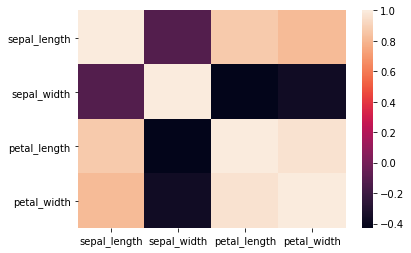

In [10]:
# Where two variables are highly correlated, you should remove one
TestCorrelations(predictors)

In [11]:
# As you remove correlated items, check VIF, ideally all VIFs are below 5
TestMulticollinearity(predictors)

,feature,VIF
0,sepal_length,262.969348
1,sepal_width,96.353292
2,petal_length,172.960962
3,petal_width,55.502060


Outlier cases are:


,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
37,4.9,3.6,1.4,0.1
41,4.5,2.3,1.3,0.3
109,7.2,3.6,6.1,2.5
117,7.7,3.8,6.7,2.2


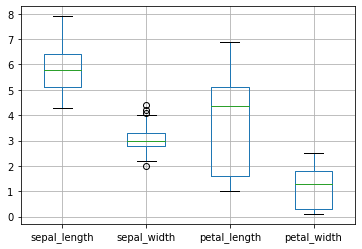

In [12]:
# Use boxplot to visualise outliers
# Use different z thresholds to eliminate outliers. 

predictors.boxplot()
outlier_cases = predictors[TestOutliers(predictors, z_threshold = 1.1)]

print("Outlier cases are:")
outlier_cases

In [13]:

# In thi example we fit a binary logistic regression which is clasifying if
# the case is a 'setosa' type iris or not. 

dependant_one_hot = dependant == 'setosa'
dependant_one_hot = dependant_one_hot.astype(int)
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(predictors, dependant_one_hot, test_size=0.2, random_state=42)

#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)

#Check precision, recall, f1-score
print( sk.metrics.classification_report(y_test, predictions) )

print( sk.metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


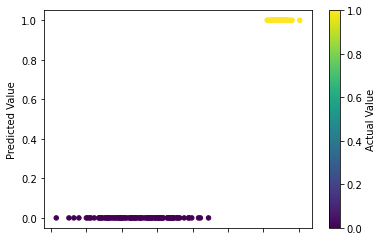

In [14]:
# Produce a simple visualisation to describe the decision boundary.
# An x axis value above 0 indicates the logistic regression modwl 
# would predict a positive class. The predicted vaulues can be compared 
# against the actual values indicated by the color.
 
LogisticRegressionScatterPlot(model, predictors, dependant_one_hot, class_int=0, color_class=1)